# Hayward Fault Sequence Simulator

### By Yair Franco
##### Started April 24, 2024

Note: this code requires Python v3.10.0 or higher to run

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Time Model

Based on Lienkaemper, 2010: https://doi.org/10.1785/0120090129

In [3]:
present = datetime.now().year #or manual input to simulate what this code would do in the future

# dates = [1868, 1725, 1629, 1475, 1317, 1134, 957, 822, 660, 444, 247, 91]
# errors = [0, 38, 46, 47, 44, 77, 21, 40, 10, 42, 40, 40]

dates = [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]
errors = [40, 40, 42,10, 40, 21, 77, 44, 47, 46, 38, 0]

In [4]:
timeset = []

for i in range(len(dates)):
    r = [dates[i]-errors[i],dates[i],dates[i]+errors[i]]
    timeset.append(r)

print(timeset)

[[51, 91, 131], [207, 247, 287], [402, 444, 486], [650, 660, 670], [782, 822, 862], [936, 957, 978], [1057, 1134, 1211], [1273, 1317, 1361], [1428, 1475, 1522], [1583, 1629, 1675], [1687, 1725, 1763], [1868, 1868, 1868]]


### Create fake sequences to test

Values to test: 

Lienkaemper, 2010 gives RI of 161 and SD of 65

Parsons, 2008 (https://doi.org/10.1029/2008GL035887) gives an RI of 210 years and coeff. of var. 0.6 (SD = 126)

Parsons, 2012 (https://doi.org/10.1029/2012GL052275) gives an RI of 211, -SD = 95, +SD = 173

In [5]:
ri = 161
sd = 65


for i in range(10):
    startyear = dates[0] + np.random.randint(-errors[0],errors[0])
    fakeseq = [startyear]

    for j in range(len(dates)-1):
        nextevent = fakeseq[j] + ri + np.random.randint(-sd,sd)
        fakeseq.append(nextevent)

    #print(fakeseq)
    print(f'Sequence {i+1} puts the 1868 earthquake in the year {fakeseq[-1]} instead.')

Sequence 1 puts the 1868 earthquake in the year 1452 instead.
Sequence 2 puts the 1868 earthquake in the year 1975 instead.
Sequence 3 puts the 1868 earthquake in the year 1843 instead.
Sequence 4 puts the 1868 earthquake in the year 1767 instead.
Sequence 5 puts the 1868 earthquake in the year 1863 instead.
Sequence 6 puts the 1868 earthquake in the year 1593 instead.
Sequence 7 puts the 1868 earthquake in the year 1884 instead.
Sequence 8 puts the 1868 earthquake in the year 1831 instead.
Sequence 9 puts the 1868 earthquake in the year 1734 instead.
Sequence 10 puts the 1868 earthquake in the year 1912 instead.


Let's count how long it takes for fake sequences to place the 1868 earthquake on the correct year.

In [6]:
success = False
att = 0

while success == False:
    att += 1
    #print(att)
    startyear = dates[0] + np.random.randint(-errors[0],errors[0])
    fakeseq = [startyear]

    for j in range(len(dates)):
        nextevent = fakeseq[j] + ri + np.random.randint(-sd,sd)
        fakeseq.append(nextevent)

    #print(fakeseq)
    success = fakeseq[-2] == dates[-1] #is the 12th generated earthquake in 1868?

print(f'It took {att} tries to generate a sequence placing the 1868 earthquake on the correct year')
print(f'This sequence places the next Hayward earthquake in the year {fakeseq[-1]}')
print(f'Successful sequence: {fakeseq}')
print(f'Lienkaemper sequence: {dates}')

It took 6 tries to generate a sequence placing the 1868 earthquake on the correct year
This sequence places the next Hayward earthquake in the year 2055
Successful sequence: [61, 194, 403, 562, 689, 838, 936, 1063, 1288, 1511, 1677, 1868, 2055]
Lienkaemper sequence: [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]


Let's add another constraint: the 13th earthquake generated should be after the present (since there hasn't been one since 1868).

In [7]:
ri = 161
sd = 65
success = False
att = 0

while success == False:
    att += 1
    #print(att)
    startyear = dates[0] + np.random.randint(-errors[0],errors[0])
    fakeseq = [startyear]

    for j in range(len(dates)):
        nextevent = fakeseq[j] + ri + np.random.randint(-sd,sd)
        fakeseq.append(nextevent)

    #if fakeseq[-2] == dates[0] or fakeseq[-1] == present: print(fakeseq[-2],fakeseq[-1])

    if fakeseq[-2] == dates[-1] and fakeseq[-1] > present:
        success = True



print(f'It took {att} tries to generate a sequence placing the 1868 earthquake on the correct year')
print(f'This sequence places the next Hayward earthquake in the year {fakeseq[-1]}')
print(f'Successful sequence: {fakeseq}') 
print(f'Lienkaemper sequence: {dates}')

It took 584 tries to generate a sequence placing the 1868 earthquake on the correct year
This sequence places the next Hayward earthquake in the year 2064
Successful sequence: [96, 299, 482, 629, 805, 943, 1048, 1162, 1360, 1528, 1670, 1868, 2064]
Lienkaemper sequence: [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]


This function returns the recurrence intervals for any given sequence. It'll be useful later

In [8]:
def calcRI(seq,getMean=0): #setting get mean to 1 will calculate RI mean and sd for the given sequence
    ri = []

    for i in range(len(seq)-1):
        interval = seq[i+1] - seq[i]
        ri.append(interval)

    match getMean:
        case 0:
            return ri

        case 1:
            mean = int(np.mean(ri))
            sd = int(np.std(ri))
            return ri, mean, sd
        
    # if getMean == 0: #for python versions older than 3.10, replace 'match' code with this
    #     return ri
    # elif getMean == 1:
    #     mean = int(np.mean(ri))
        # sd = int(np.std(ri))
    #     return ri, mean, sd

Now let's use Numpy's Gaussian RNG to favor the mean Lienkaemper dates, instead of using the average RI for the whole sequence. Additionally, let's consider all sequences placing the next earthquake before 2024 as fails (since the next earthquake has not happened yet).

Obviously, this will always return a sequence with an earthquake in 1868, since we know this event's exact date.

Since we do not know when the next earthquake will happen, we'll use the calculate the mean and SD of the RIs for our generated sequence, and make a guess based on the results.

In [9]:
success = False
att = 0

while success == False:
    att += 1
    seq = []

    for j in range(len(dates)):
        event = int(np.random.normal(dates[j],errors[j])) #random guess assuming normal distributions of given standard deviations
        seq.append(event)

    mean, sd = calcRI(seq,1)[1], calcRI(seq,1)[2] #mean RI for all events in this synthetic sequence
    nextevent = seq[-1] + int(np.random.normal(mean, sd))
    seq.append(nextevent)

    if seq[-1] > present:
        success = True #is the 12th generated earthquake in 1868? Is the next one in the future?

print(f'Attempt count: {att}')
print(f'This sequence places the next Hayward earthquake in the year {seq[-1]}')
print(f'This sequence: {seq}')
print(f'Lienkaemper sequence: {dates}')

Attempt count: 1
This sequence places the next Hayward earthquake in the year 2062
This sequence: [121, 305, 397, 655, 790, 937, 1044, 1332, 1502, 1674, 1765, 1868, 2062]
Lienkaemper sequence: [91, 247, 444, 660, 822, 957, 1134, 1317, 1475, 1629, 1725, 1868]


In [10]:
nextdates = []
s = 0
sequences = 100000
means = []
sds = []
sq = []

for i in range(sequences): #initialize sequences
    success = False
    att = 0

    while success == False:
        att += 1
        seq = []

        for j in range(len(dates)-1):
            add = False

            if j == 0: #set first event. No need for it to have certain bounds
                event = int(np.random.normal(dates[j],errors[j])) #random guess assuming normal distributions of given standard deviations
            elif j > 0:
                while add == False:
                    event = int(np.random.normal(dates[j],errors[j]))
                    # print(f'Adding event {j}: Year {event} Previous = {seq[j-1]} Fail? {event < seq[-1]}')
                    if event < seq[j-1]: #avoids events happening before the previous ones
                        continue
                    elif event >= seq[j-1]:
                        add = True
            seq.append(event)

        seq.append(dates[-1]) #add 1686 earthquake manually

        meanRI, sdRI = calcRI(seq,1)[1], calcRI(seq,1)[2] #mean RI for all events in this synthetic sequence

        # means.append(mean)
        # sds.append(sd)
        add = False
        while add == False:
            nextevent = seq[-1] + int(np.random.normal(meanRI, sdRI))
            if nextevent < seq[-1]:
                continue
            elif nextevent >= seq[j-1]:
                add = True
                
        seq.append(nextevent)

        sq.append(seq)
        nextdates.append(seq[-1])
        success = True

print(nextdates[-1])

KeyboardInterrupt: 

Let's visualize the sequences we've generated. They should look somewhat like a figure in Lienkaemper, 2010.

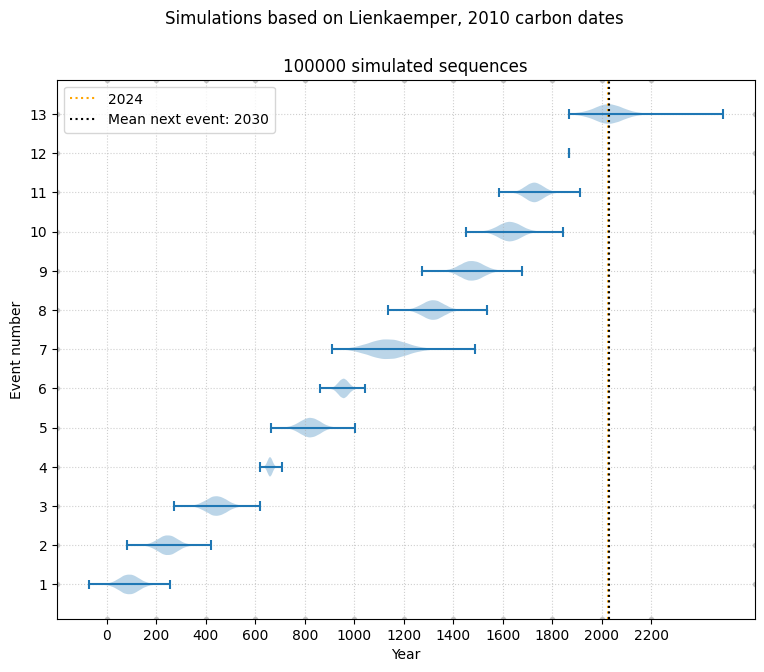

In [ ]:
x = np.arange(1,len(seq)+1,1)

fig, ax = plt.subplots(figsize=(9,7))

fig.suptitle(f'Simulations based on Lienkaemper, 2010 carbon dates')

ax.set_title(f"{len(sq)} simulated sequences")
ax.set_ylabel(f"Event number")
ax.set_xlabel(f'Year')
ax.set_yticks(x)
ax.set_xticks(np.arange(0,2400,200))
ax.axvline(2024,linestyle=':',color='orange',label='2024')
ax.axvline(np.mean(nextdates),linestyle=':',color='black',label=f'Mean next event: {round(np.mean(nextdates))}')


by_event = []
for i in range(len(x)):
    by_event.append([ev[i] for ev in sq])

ax.violinplot(by_event,vert=False)
ax.grid(alpha=0.6,marker='.',ls=':')
ax.legend(loc=2)

plt.show()

Just for fun, let's make a histogram of the years this simulation gives for the next earthquake.

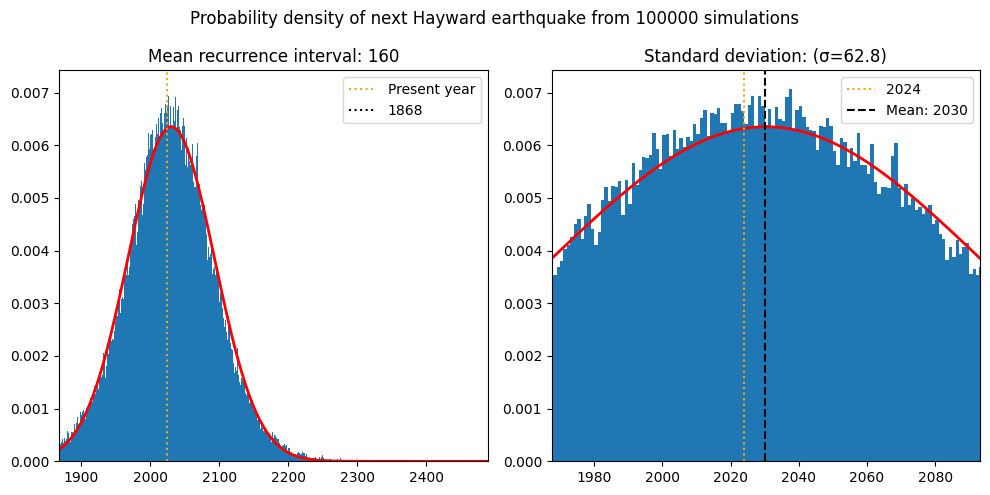

In [ ]:
h = np.array([x[-1] for x in sq])
binsize = max(h) - min(h)
sigma = np.std(h)
mu = np.mean(h)

fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(10,5))

fig.suptitle(f'Probability density of next Hayward earthquake from {len(h)} simulations')

count, bins, ignored = ax[0].hist(h, binsize, density=True) #plot main hist
gauss = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp((-1/2)*((bins-mu)/sigma)**2)

ax[0].set_title(f"Mean recurrence interval: {meanRI}")
ax[1].set_title(f"Standard deviation: (σ={round(sigma,1)})")

ax[0].plot(bins, gauss,
         linewidth=2, color='r')

ax[0].set_xlim(min(h),max(h))
ax[0].axvline(present,linestyle=':',color='orange',label='Present year')
ax[0].axvline(1868,linestyle=':',color='black',label='1868')
ax[0].legend()


ax[1].hist(h, binsize, density=True) #plot sub hist
ax[1].plot(bins, gauss,
         linewidth=2, color='r')

ax[1].axvline(2024,linestyle=':',color='orange',label='2024')
ax[1].axvline(round(mu),linestyle='--',color='black',label=f'Mean: {round(mu)}')

ax[1].set_xlim(mu-sigma,mu+sigma)
ax[1].legend()
#ax[1].set_xlim(2000,2100)

plt.show()

We know this works, so let's recreate Parsons, 2008.

Base steps:

1. A free event takes place before the first earthquake as a nucleation point for the sequence, and any number of events may happen 500 years before the first actual event. These are not included in the count
2. The next event is determined by a set RI and coefficient of variation, which are the parameters being tested
3. Only sequences within the given constraints are considered successes

In [ ]:
nextdates = []
means = []
sds = []
sq = []
s = 0

testRI = 160
testCV = 0.6
testSD = testRI * testCV

makesequences = 10
for i in range(makesequences): #initialize sequences
    success = False
    att = 0

    while success == False: #sequence start
        seq = []
        event = dates[0] - 500 #free period where sequence can have any number of earthquakes
    #instead of slowly allowing to keep generating, just create the sequence and COMPARE to the timeset to decide whether to keep it or not

        while True:
            try:
                interval = int(np.random.normal(testRI,testSD))
                if interval <= 0: #this prevents negative intervals. This number could be raised to an arbitrary level (e.g. 20 years) since large earthquakes do not follow each other very quickly
                    raise Exception
                
                if event + interval > dates[-1]: #end sequence at or before 1868
                    break

                event += interval #next event year
                seq.append(event)

            except:
                continue
        
        #we have a list at this point
        #compare to time set for success (= True), otherwise try again (continue)
        


        # seq.append(dates[-1]) #add 1686 earthquake manually

        meanRI, sdRI = calcRI(seq,1)[1], calcRI(seq,1)[2] #mean RI for all events in this synthetic sequence

        # means.append(mean)
        # sds.append(sd)
        add = False
        while add == False:
            nextevent = seq[-1] + int(np.random.normal(meanRI, sdRI)) #calculate new event given this sequence's mean and SD
            if nextevent < seq[-1]:
                continue
            elif nextevent >= seq[j-1]:
                add = True
                
        seq.append(nextevent)

        sq.append(seq)
        nextdates.append(seq[-1])
        success = True

print(nextdates[-1])

[2097,
 1998,
 2004,
 2018,
 2034,
 1966,
 2148,
 1982,
 2069,
 1933,
 2159,
 2004,
 2047,
 2012,
 2055,
 2080,
 1875,
 2134,
 2172,
 2033,
 2005,
 2002,
 2017,
 2022,
 1954,
 2035,
 2015,
 2000,
 1936,
 2034,
 1969,
 2014,
 2019,
 1998,
 1956,
 2033,
 2022,
 1932,
 2146,
 1979,
 1972,
 2034,
 2006,
 1992,
 1991,
 2062,
 2108,
 1948,
 2021,
 2054,
 2029,
 2063,
 1989,
 1997,
 1935,
 1982,
 2060,
 2058,
 2038,
 1837,
 1959,
 2117,
 2160,
 1989,
 1910,
 2061,
 1982,
 1941,
 2057,
 2050,
 1975,
 2011,
 2148,
 2059,
 2133,
 2065,
 1962,
 1952,
 2050,
 1984,
 1898,
 1944,
 2049,
 2086,
 2059,
 2013,
 1955,
 2013,
 2065,
 1972,
 1998,
 1977,
 1986,
 2052,
 2035,
 2107,
 2168,
 2123,
 2046,
 1831,
 2054,
 2007,
 1989,
 2049,
 2083,
 1984,
 2063,
 1950,
 2038,
 2140,
 2105,
 1965,
 2060,
 1950,
 2119,
 2106,
 2070,
 1980,
 2023,
 2105,
 1965,
 2093,
 2024,
 2078,
 1994,
 1971,
 2011,
 1909,
 2026,
 2000,
 1929,
 2058,
 2051,
 2041,
 2048,
 2018,
 2120,
 2061,
 2109,
 2023,
 1961,
 1983,
 1961,

In [209]:
testRI = 160
testCV = 0.6
testSD = testRI * testCV
s = False
vals = []

for i in range(100):
    print(i)
    s = False
    while s == False:
        try:
            n = int(np.random.normal(testRI,testSD))
            if n <= 0:
                raise Exception
            s = True
        except:
            continue
    vals.append(n)

print(f'vals {vals}')

0
succ 184
1
succ 351
2
succ 227
3
succ 157
4
succ 66
5
succ 201
6
succ 153
7
succ 205
8
succ 137
9
succ 4
10
succ 121
11
succ 285
12
succ 143
13
succ 112
14
succ 200
15
succ 79
16
succ 273
17
succ 84
18
succ 276
19
succ 80
20
succ 237
21
succ 292
22
succ 21
23
succ 178
24
succ 93
25
succ 261
26
succ 245
27
succ 213
28
succ 193
29
succ 180
30
succ 287
31
succ 242
32
succ 239
33
succ 181
34
succ 228
35
succ 198
36
succ 256
37
succ 370
38
succ 198
39
succ 90
40
succ 246
41
succ 219
42
succ 238
43
succ 131
44
succ 268
45
fail -167
succ 108
46
succ 366
47
succ 158
48
succ 90
49
succ 83
50
fail 0
fail -76
succ 347
51
succ 64
52
succ 228
53
succ 253
54
succ 199
55
succ 283
56
fail -27
succ 270
57
succ 109
58
succ 200
59
succ 396
60
succ 186
61
succ 233
62
succ 179
63
succ 445
64
succ 106
65
succ 166
66
succ 261
67
succ 58
68
succ 70
69
succ 134
70
fail -43
succ 109
71
succ 36
72
succ 155
73
succ 184
74
succ 324
75
succ 48
76
succ 170
77
succ 169
78
succ 100
79
fail -134
succ 273
80
succ 175


In [230]:
seq = []
# success = False
event = 0

while True:
    try:
        interval = int(np.random.normal(testRI,testSD))
        if interval <= 0: #this prevents negative intervals. This number could be raised to an arbitrary level (e.g. 20 years) since large earthquakes do not follow each other very quickly
            raise Exception
        
        print(f'succ int {interval} -> ev {event}. next {event + interval}')
        if event + interval >= 1868:
            break

        event += interval
        seq.append(event)

    except:
        print(f'fail - interval negative: {interval}')
        continue

    print(seq)

succ int 244 -> ev 0. next 244
[244]
succ int 228 -> ev 244. next 472
[244, 472]
succ int 249 -> ev 472. next 721
[244, 472, 721]
succ int 133 -> ev 721. next 854
[244, 472, 721, 854]
fail - interval negative: -4
succ int 103 -> ev 854. next 957
[244, 472, 721, 854, 957]
succ int 139 -> ev 957. next 1096
[244, 472, 721, 854, 957, 1096]
succ int 200 -> ev 1096. next 1296
[244, 472, 721, 854, 957, 1096, 1296]
succ int 28 -> ev 1296. next 1324
[244, 472, 721, 854, 957, 1096, 1296, 1324]
succ int 53 -> ev 1324. next 1377
[244, 472, 721, 854, 957, 1096, 1296, 1324, 1377]
succ int 176 -> ev 1377. next 1553
[244, 472, 721, 854, 957, 1096, 1296, 1324, 1377, 1553]
succ int 174 -> ev 1553. next 1727
[244, 472, 721, 854, 957, 1096, 1296, 1324, 1377, 1553, 1727]
succ int 10 -> ev 1727. next 1737
[244, 472, 721, 854, 957, 1096, 1296, 1324, 1377, 1553, 1727, 1737]
succ int 271 -> ev 1737. next 2008


In [250]:
for i, range in enumerate(timeset):
    print(i)
    for d in dates:
        if d >= range[0] and d < range[2] or d == range[1]: #if date is within any of the bounds or equals the exact mean
            print(f'found a match: fake event {d} within bounds of real event {i}')


0
found a match: fake event 91 within bounds of real event 0
1
found a match: fake event 247 within bounds of real event 1
2
found a match: fake event 444 within bounds of real event 2
3
found a match: fake event 660 within bounds of real event 3
4
found a match: fake event 822 within bounds of real event 4
5
found a match: fake event 957 within bounds of real event 5
6
found a match: fake event 1134 within bounds of real event 6
7
found a match: fake event 1317 within bounds of real event 7
8
found a match: fake event 1475 within bounds of real event 8
9
found a match: fake event 1629 within bounds of real event 9
10
found a match: fake event 1725 within bounds of real event 10
11
found a match: fake event 1868 within bounds of real event 11


In [238]:
len(timeset)

12